In [1]:
import nltk
import pandas as pd

In [2]:
# packages of nltk, the one we look for is the world package
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
# corpus of messages
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
messages[51]

'ham\tA gram usually runs like  &lt;#&gt; , a half eighth is smarter though and gets you almost a whole second gram for  &lt;#&gt;'

In [5]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print()
    

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [6]:
messages[0] #tab separated messages

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [8]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Explaratory data analysis

In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
# what separates a ham from a spam?

In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
# feature engineering: the better knowledge on the data, the better engineering

In [14]:
messages['length']= messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [18]:
%matplotlib inline

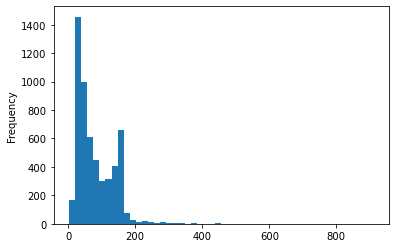

In [19]:
#distribution of the message length
messages['length'].plot.hist(bins=50)

In [20]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [21]:
love = messages[messages['length']==910]

In [22]:
print(love['message'].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa140a0550>,
      dtype=object)

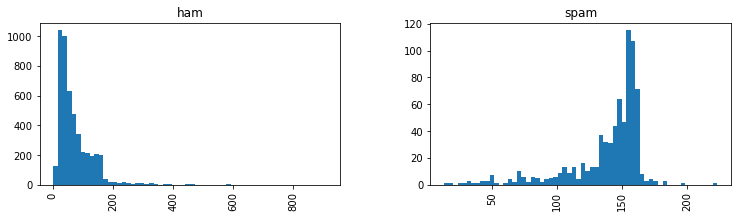

In [23]:
# plot smap vs ham in char length
messages.hist(column='length', by='label', bins=60, figsize=(12,3))

# NLP part 2

In [25]:
# convert a corpus of strings to vectors. Like bag of words for example! Sequence of numbers

In [26]:
import string 

First we begin by remove punctuation

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
mess = "Yo!! To ! Kokta bebbeb...!#"
nopunc = [c for c in mess if c not in string.punctuation]

In [29]:
import nltk
from nltk.corpus import stopwords

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aissata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
nopunc = ''.join(nopunc)

In [32]:
nopunc
# stopwords.words('spanish')

'Yo To  Kokta bebbeb'

In [33]:
test = "Sample message!! notice % it has puntuation...."

In [34]:
clean_test = [word for word in test.split() if (word.lower() not in stopwords.words('english') and word.lower() not in string.punctuation)]

In [35]:
clean_test

['Sample', 'message!!', 'notice', 'puntuation....']

In [36]:
# a function to clean all the shit

In [37]:
def text_processing(mess):
    """
    1 remove punctuation 
    2 remove stop words
    3 return list of clean words
    """
    nopunc = [c for c in mess if c not in string.punctuation]  
    nopunc = ''.join(nopunc)
    nopunc = [word for word in nopunc.split() if word not in stopwords.words('english')] 
    return nopunc

In [38]:
messages['message'].head(10).apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6    [Even, brother, like, speak, They, treat, like...
7    [As, per, request, Melle, Melle, Oru, Minnamin...
8    [WINNER, As, valued, network, customer, select...
9    [Had, mobile, 11, months, U, R, entitled, Upda...
Name: message, dtype: object

In [39]:
# We can continue normalization but now we will focus in vektorization
# very large 2D matrix with all the words and all the occurences
# Scikit will output a sparse matrix

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
bag_of_words_transformer = CountVectorizer(analyzer=text_processing).fit(messages['message'])

Creating a very large matrix!

In [42]:
print(len(bag_of_words_transformer.vocabulary_))

11617


In [43]:
mess4 = messages['message'][3]

In [44]:
print(mess4)

U dun say so early hor... U c already then say...


In [45]:
bow4 = bag_of_words_transformer.transform([mess4])

In [46]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [47]:
bow4.shape

(1, 11617)

In [48]:
# how to get which words appear twice=
bag_of_words_transformer.get_feature_names()[4221]
bag_of_words_transformer.get_feature_names()[9746]

'say'

### Term frequency and inverse frequency


In [49]:
messages_bow = bag_of_words_transformer.transform(messages['message'])

In [50]:
print("Shape of spare matrix ", messages_bow.shape)

Shape of spare matrix  (5572, 11617)


In [51]:
messages_bow.nnz # non zero occurences

56024

In [52]:
messages_bow

<5572x11617 sparse matrix of type '<class 'numpy.int64'>'
	with 56024 stored elements in Compressed Sparse Row format>

In [53]:
sparcity = (100.0*messages_bow.nnz /(messages_bow.shape[0]*messages_bow.shape[1]))

In [122]:
sparcity

0.08655038742205227

In [133]:
from sklearn.feature_extraction.text import TfidfTransformer

In [136]:
tifi_tranformer = TfidfTransformer().fit(messages_bow)

In [138]:
tifi4 = tifi_tranformer.transform(bow4)

In [139]:
#  inverse document frequency
# a weight value for each of this words
print(tifi4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [140]:
tifi_tranformer.idf_[bag_of_words_transformer.vocabulary_['university']]

8.527076498901426

In [141]:
message_tfidf = tifi_tranformer.transform(messages_bow)

In [143]:
message_tfidf
# messages are represented as numerical vectors!

<5572x11617 sparse matrix of type '<class 'numpy.float64'>'
	with 56024 stored elements in Compressed Sparse Row format>

In [144]:
# Let's use naive bayes

In [145]:
from sklearn.naive_bayes import MultinomialNB

In [146]:
spam_detect_model = MultinomialNB().fit(message_tfidf, messages['label'])

In [147]:
spam_detect_model.predict(tifi4)

array(['ham'], dtype='<U4')

In [148]:
all_pred = spam_detect_model.predict(message_tfidf)

In [149]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [150]:
from sklearn.model_selection import train_test_split


In [151]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3 )

In [153]:
from sklearn.pipeline import Pipeline

In [54]:
# steps  = list with everything we want to do
pipeline = Pipeline([('bag_of_words', CountVectorizer(analyzer=text_processing)),
                    ('tfidf', TfidfTransformer()),
                    ('classifier', MultinomialNB())
                    ])

NameError: name 'Pipeline' is not defined

In [ ]:
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
print(classification_report(label_test, predictions))